In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv(r"C:\Users\igbhu\Downloads\archive (5)\DataAnalyst.csv")

# Preview data
df.head(10)


In [71]:
df.shape        


(2253, 9)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   S No.            2253 non-null   int64 
 1   Job Title        2253 non-null   object
 2   Salary Estimate  2253 non-null   object
 3   Job Description  2253 non-null   object
 4   Company Name     2252 non-null   object
 5   Location         2253 non-null   object
 6   Size             2253 non-null   object
 7   Industry         2253 non-null   object
 8   Revenue          2253 non-null   object
dtypes: int64(1), object(8)
memory usage: 158.5+ KB


In [73]:
df.describe()

,S No.
count,2253.0000
mean,1126.0000
std,650.5294
min,0.0000
25%,563.0000
50%,1126.0000
75%,1689.0000
max,2252.0000


In [74]:
df.columns

Index(['S No.', 'Job Title', 'Salary Estimate', 'Job Description',
       'Company Name', 'Location', 'Size', 'Industry', 'Revenue'],
      dtype='object')

In [75]:
df['Job Title'].value_counts().head(10)

Job Title
Data Analyst               405
Senior Data Analyst         90
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            21
Data Quality Analyst        17
Data Analyst II             17
Data Analyst Junior         17
Data Governance Analyst     16
Lead Data Analyst           15
Name: count, dtype: int64

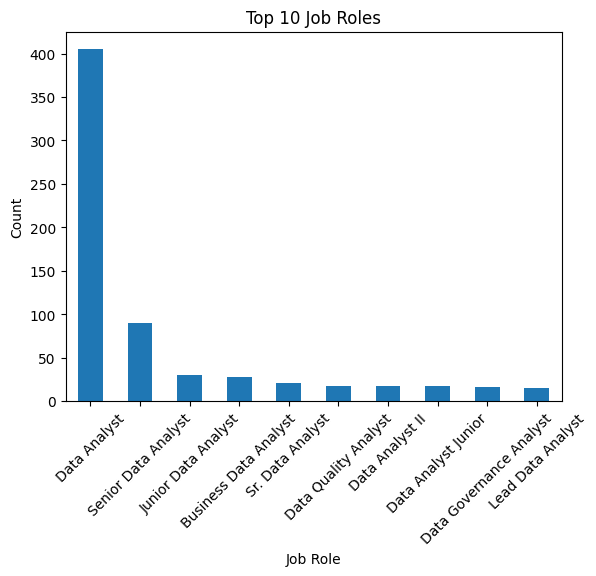

In [76]:
plt.figure()
df['Job Title'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [77]:
df['Location'].value_counts().head(10)


Location
New York, NY         310
Chicago, IL          130
San Francisco, CA    119
Austin, TX            81
Los Angeles, CA       80
Charlotte, NC         78
Houston, TX           72
Dallas, TX            66
San Diego, CA         62
Philadelphia, PA      56
Name: count, dtype: int64

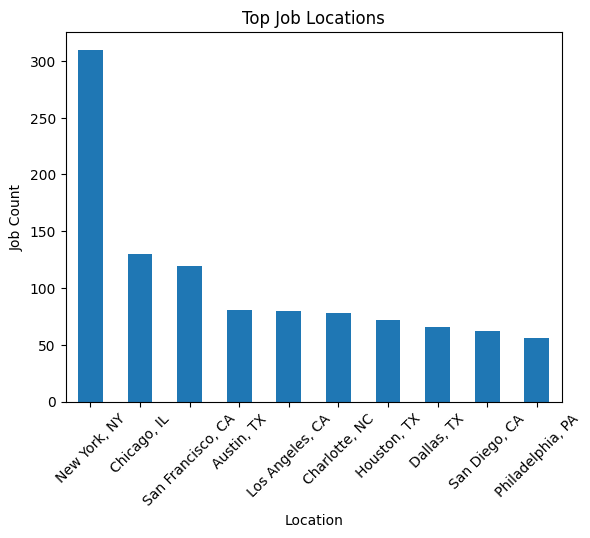

In [78]:
plt.figure()
df['Location'].value_counts().head(10).plot(kind='bar')
plt.title('Top Job Locations')
plt.xlabel('Location')
plt.ylabel('Job Count')
plt.xticks(rotation=45)
plt.show()


In [79]:
df['Salary Estimate'].value_counts().head()


Salary Estimate
$41K-$78K (Glassdoor est.)     57
$42K-$76K (Glassdoor est.)     57
$50K-$86K (Glassdoor est.)     41
$35K-$67K (Glassdoor est.)     33
$60K-$124K (Glassdoor est.)    31
Name: count, dtype: int64

In [80]:
df['Industry'].value_counts().head(10)

Industry
-1                                         353
IT Services                                325
Staffing & Outsourcing                     323
Health Care Services & Hospitals           151
Computer Hardware & Software               111
Consulting                                 111
Investment Banking & Asset Management       78
Enterprise Software & Network Solutions     69
Internet                                    65
Advertising & Marketing                     51
Name: count, dtype: int64

In [81]:
df['Company Name'].value_counts().head(10)

Company Name
Staffigo Technical Services, LLC\n5.0    58
Diverse Lynx\n3.9                        22
Lorven Technologies Inc\n4.0             19
Kforce\n4.1                              19
Robert Half\n3.5                         14
Avacend, Inc.\n2.5                       13
Mondo\n3.9                               11
eTeam Inc.\n3.7                          10
Apple\n4.1                               10
Apex Systems\n3.8                        10
Name: count, dtype: int64

In [82]:
df.isnull().sum()


S No.              0
Job Title          0
Salary Estimate    0
Job Description    0
Company Name       1
Location           0
Size               0
Industry           0
Revenue            0
dtype: int64

In [83]:
skills_list = [
    'python', 'sql', 'excel', 'tableau', 'power bi', 'powerbi',
    'r', 'statistics', 'machine learning', 'ml',
    'deep learning', 'nlp',
    'data analysis', 'data analytics',
    'pandas', 'numpy', 'matplotlib', 'seaborn',
    'communication', 'problem solving'
]


In [85]:

job_desc = df['Job Description']      # this select column
job_desc = job_desc.dropna()           # remove missing values
job_desc = job_desc.str.lower()        # convert to lowercase



In [86]:
#This Count Skill Frequencies
skills_found = []

for desc in job_desc:
    for skill in skills_list:
        if skill in desc:
            skills_found.append(skill)

skill_counts = pd.Series(skills_found).value_counts().reset_index()
skill_counts.columns = ['Skill', 'Frequency']

skill_counts.head(15)

,Skill,Frequency
0,r,2252
1,sql,1389
2,excel,1354
3,communication,1154
4,data analysis,717
5,python,637
6,tableau,620
7,statistics,563
8,data analytics,413
9,ml,314


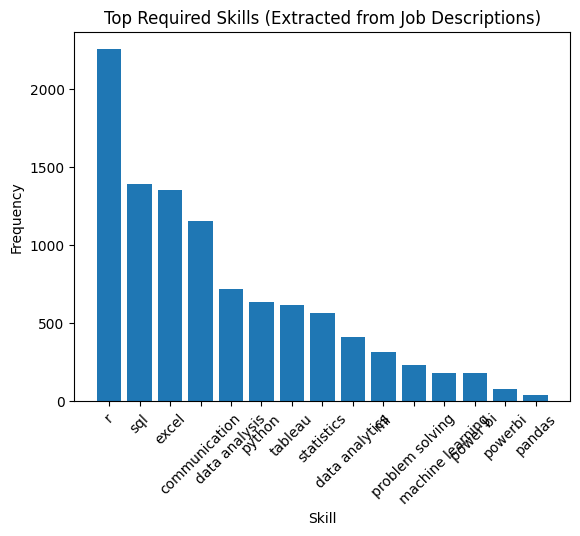

In [87]:
plt.figure()
plt.bar(skill_counts['Skill'][:15], skill_counts['Frequency'][:15])
plt.title('Top Required Skills (Extracted from Job Descriptions)')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [88]:
#this Remove Unnecessary Columns
df.drop(columns=['S No.'], inplace=True)


In [21]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Size', 'Industry', 'Revenue'],
      dtype='object')

In [89]:
#Duplicate Records Check 
df.duplicated().sum()


np.int64(0)

In [90]:
#If duplicates exist,this remove them
df.drop_duplicates(inplace=True)


In [91]:
df['Salary Estimate'].unique()


array(['$37K-$66K (Glassdoor est.)', '$46K-$87K (Glassdoor est.)',
       '$51K-$88K (Glassdoor est.)', '$51K-$87K (Glassdoor est.)',
       '$59K-$85K (Glassdoor est.)', '$43K-$76K (Glassdoor est.)',
       '$60K-$110K (Glassdoor est.)', '$41K-$78K (Glassdoor est.)',
       '$45K-$88K (Glassdoor est.)', '$73K-$127K (Glassdoor est.)',
       '$84K-$90K (Glassdoor est.)', '$27K-$52K (Glassdoor est.)',
       '$42K-$74K (Glassdoor est.)', '$77K-$132K (Glassdoor est.)',
       '$98K-$114K (Glassdoor est.)', '$48K-$96K (Glassdoor est.)',
       '$26K-$47K (Glassdoor est.)', '$31K-$59K (Glassdoor est.)',
       '$47K-$81K (Glassdoor est.)', '$43K-$69K (Glassdoor est.)',
       '$49K-$112K (Glassdoor est.)', '$30K-$54K (Glassdoor est.)',
       '$55K-$103K (Glassdoor est.)', '$37K-$70K (Glassdoor est.)',
       '$57K-$103K (Glassdoor est.)', '$35K-$45K (Glassdoor est.)',
       '$42K-$66K (Glassdoor est.)', '$65K-$81K (Glassdoor est.)',
       '$113K-$132K (Glassdoor est.)', '$42K-$63K (Glas

In [95]:
df['Salary Estimate'] = (
    df['Salary Estimate']
    .str.replace('$', '', regex=False)
    .str.replace('K', '', regex=False)
    .str.replace('(Glassdoor est.)', '', regex=False)
    .str.strip()
)


In [104]:
df['Salary Estimate'] = df['Salary Estimate'].str.replace('()', '', regex=False)


In [105]:
salary_split = df['Salary Estimate'].str.split('-', expand=True)

df['Salary_Min'] = pd.to_numeric(salary_split[0], errors='coerce')
df['Salary_Max'] = pd.to_numeric(salary_split[1], errors='coerce')


In [106]:

df[['Salary Estimate', 'Salary_Min', 'Salary_Max']].head()


,Salary Estimate,Salary_Min,Salary_Max
0,37-66,37,66
1,37-66,37,66
2,37-66,37,66
3,37-66,37,66
4,37-66,37,66


In [107]:
#Convert to lowercase & strip spaces
df['Location'] = df['Location'].str.lower().str.strip()


In [108]:
# basic standardization example
df['Location'] = df['Location'].replace({
    'new delhi': 'delhi',
    'bengaluru': 'bangalore'
})


In [109]:
#Job Title (drop if missing)
df = df[df['Job Title'].notna()]


In [110]:
#Job Description
df['Job Description'] = df['Job Description'].fillna('')


In [112]:
#final data check
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 2252 entries, 0 to 2252
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        2252 non-null   object
 1   Salary Estimate  2252 non-null   object
 2   Job Description  2252 non-null   object
 3   Company Name     2251 non-null   object
 4   Location         2252 non-null   object
 5   Size             2252 non-null   object
 6   Industry         2252 non-null   object
 7   Revenue          2252 non-null   object
 8   Salary_Min       2252 non-null   int64 
 9   Salary_Max       2252 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 193.5+ KB


,Job Title,Salary Estimate,Job Description,Company Name,Location,Size,Industry,Revenue,Salary_Min,Salary_Max
0,"Data Analyst, Center on Immigration and Justic...",37-66,Are you eager to roll up your sleeves and harn...,Vera Institute of Justice\n3.2,"new york, ny",201 to 500 employees,Social Assistance,$100 to $500 million (USD),37,66
1,Quality Data Analyst,37-66,Overview\n\nProvides analytical and technical ...,Visiting Nurse Service of New York\n3.8,"new york, ny",10000+ employees,Health Care Services & Hospitals,$2 to $5 billion (USD),37,66
2,"Senior Data Analyst, Insights & Analytics Team...",37-66,We’re looking for a Senior Data Analyst who ha...,Squarespace\n3.4,"new york, ny",1001 to 5000 employees,Internet,Unknown / Non-Applicable,37,66
3,Data Analyst,37-66,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,Celerity\n4.1,"new york, ny",201 to 500 employees,IT Services,$50 to $100 million (USD),37,66
4,Reporting Data Analyst,37-66,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,FanDuel\n3.9,"new york, ny",501 to 1000 employees,Sports & Recreation,$100 to $500 million (USD),37,66


In [4]:
df.rename(columns={
    'Job Title': 'job_title',
    'Company Name': 'company',
    'Location': 'location',
    'Job Description': 'job_description'
}, inplace=True)


In [5]:
skills = ['python', 'sql', 'excel', 'power bi', 'tableau']

for skill in skills:
    df[skill.replace(' ', '_')] = df['job_description'].str.lower().apply(
        lambda x: 1 if skill in x else 0
    )


In [6]:
df_sql = df[
    ['job_title', 'company', 'location',
     'python', 'sql', 'excel', 'power_bi', 'tableau']
]


In [8]:
df_sql.head()


,job_title,company,location,python,sql,excel,power_bi,tableau
0,"Data Analyst, Center on Immigration and Justic...",Vera Institute of Justice\n3.2,"New York, NY",1,1,0,0,0
1,Quality Data Analyst,Visiting Nurse Service of New York\n3.8,"New York, NY",0,1,1,0,0
2,"Senior Data Analyst, Insights & Analytics Team...",Squarespace\n3.4,"New York, NY",1,1,1,0,1
3,Data Analyst,Celerity\n4.1,"New York, NY",0,1,0,0,1
4,Reporting Data Analyst,FanDuel\n3.9,"New York, NY",1,1,1,0,0


In [22]:
import pandas as pd

df = pd.read_csv("job_postings_sql_cleaned.csv")

skills = ['python', 'sql', 'excel', 'power_bi', 'tableau']

for skill in skills:
    df[skill] = df[skill].apply(
        lambda x: 1 if isinstance(x, str) and x.strip().lower() == skill else 0
    )

df.head()


,job_title,Salary Estimate,job_description,company,location,Size,Industry,Revenue,python,sql,excel,power_bi,tableau
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Social Assistance,$100 to $500 million (USD),0,0,0,0,0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Health Care Services & Hospitals,$2 to $5 billion (USD),0,0,0,0,0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,Squarespace\n3.4,"New York, NY",1001 to 5000 employees,Internet,Unknown / Non-Applicable,0,0,0,0,0
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,Celerity\n4.1,"New York, NY",201 to 500 employees,IT Services,$50 to $100 million (USD),0,0,0,0,0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,FanDuel\n3.9,"New York, NY",501 to 1000 employees,Sports & Recreation,$100 to $500 million (USD),0,0,0,0,0


In [23]:
df.to_csv("job_postings_sql_final.csv", index=False)
